In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('complaints_processed.csv')
df

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [3]:
data = pd.DataFrame(df.narrative)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   narrative  162411 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [5]:
data.isnull().sum()

narrative    10
dtype: int64

In [6]:
data = data.dropna()

### Converted to Lower

In [7]:
data.narrative = data.narrative.str.lower()

### Removing URL

In [8]:
data.narrative = data.narrative.str.replace(r'http\S+|www.\S+','',case = False)

In [9]:
data.iloc[1,0]

'forwarded message date tue subject please investigate comenity bank retailer card scam sent hello name scammed comenity bank credit card provider company childrens place new york forever victoria secret original credit comenity bank lower limit began charge overage fee along late fee began pay close attention card find limit also changed well incurring overage late fee reached company comenity bank stated would change credit limit original limit reached told summit payment account corrected comenity bank credit card impacted credit score plummeted negative status im currently paying price due corruption affected detrimental way debt due company charging overage fee well late fee even initial credit limit fluctuating tremendously company charge major fee account willing correct account nervous said attorney reason im reaching im employee company ruining credit plz help name contact info thank'

### Remove punctuation

In [10]:
import string

In [11]:
punctuation_list = string.punctuation
punctuation_list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(text):
    without_puctuation = " "
    for i in text:
        if i not in string.punctuation:
            without_puctuation +=i

    return without_puctuation
            

In [13]:
remove_punctuation('are you really happy??')

' are you really happy'

### Remove Number

In [14]:
data.narrative = data.narrative.str.replace('\d+','')

### Removing Stop Words

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MR.GODHADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [17]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['narrative'] = data['narrative'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

In [19]:
data['narrative'][1]

'forwarded message date tue subject please investigate comenity bank retailer card scam sent hello name scammed comenity bank credit card provider company childrens place new york forever victoria secret original credit comenity bank lower limit began charge overage fee along late fee began pay close attention card find limit also changed well incurring overage late fee reached company comenity bank stated would change credit limit original limit reached told summit payment account corrected comenity bank credit card impacted credit score plummeted negative status im currently paying price due corruption affected detrimental way debt due company charging overage fee well late fee even initial credit limit fluctuating tremendously company charge major fee account willing correct account nervous said attorney reason im reaching im employee company ruining credit plz help name contact info thank'

### Common Words

In [20]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\MR.GODHADE\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [21]:
words

{'gustative',
 'Melicertidae',
 'arthral',
 'Chemakuan',
 'downface',
 'Heraclean',
 'Cherkess',
 'overjocular',
 'Pentastomida',
 'litaneutical',
 'Tribulus',
 'unrulily',
 'firman',
 'homeomorphic',
 'biogenous',
 'call',
 'standpost',
 'xerophagia',
 'slud',
 'zoograft',
 'Venus',
 'daidle',
 'misdelivery',
 'remediably',
 'impound',
 'unconcealingly',
 'Butyn',
 'remover',
 'unspelled',
 'conrector',
 'misuse',
 'overspaciousness',
 'unremembrance',
 'counterengagement',
 'chamaerrhine',
 'saccharinic',
 'mayor',
 'updart',
 'delabialization',
 'beckiron',
 'Wordsworthian',
 'overtrick',
 'playboy',
 'Martynia',
 'hairlet',
 'advised',
 'syphiloderm',
 'vatmaker',
 'grenadierial',
 'pulpousness',
 'reshun',
 'arabitol',
 'neurodermatitis',
 'alphabetiform',
 'handily',
 'facetious',
 'tapa',
 'uncircumspect',
 'carbonometry',
 'crustalogy',
 'Snoqualmie',
 'shaman',
 'triborough',
 'encrinitic',
 'bisectrix',
 'exculpation',
 'Morisonianism',
 'clutter',
 'unprime',
 'journalize',


In [22]:
import re
def  clean_text(text):
    text = re.sub(r"\b[a-zA-Z]\b"," ", text)
    text = re.sub("\b[a-zA-Z][a-zA-Z]\b","",text)
    text = " ".join( w for w in nltk.wordpunct_tokenize(text) if w.lower() in words )
    
    return text

In [23]:
data = pd.DataFrame(data.narrative.apply(lambda x:clean_text(x)))

In [24]:
data

,narrative
0,purchase order day shipping amount receive pro...
1,message date tue subject please investigate ba...
2,message sent subject final legal payment well ...
3,payment history missing credit report speciali...
4,payment history missing credit report made mis...
...,...
162416,name
162417,name
162418,name
162419,name


### Lemmatization

In [25]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [26]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [27]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(abc)]

In [28]:
data.narrative = data.narrative.apply(lambda x : " ".join(lemmatize_text(x)))

### Strip extra whitespace

In [29]:
data.narrative = data.narrative.str.rstrip()

### Removing Duplicate Row

In [30]:
data = data.drop_duplicates()

In [31]:
data.shape

(114487, 1)

### Document-Term Matrix

It is used to find most important word in dicuments

In [32]:
data.head()

,narrative
0,purchase order day ship amount receive product...
1,message date tue subject please investigate ba...
2,message send subject final legal payment well ...
3,payment history miss credit report specialize ...
4,payment history miss credit report make mistak...


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=2500)

In [34]:
data_dtm = cv.fit_transform(data.narrative).toarray()


### DTM- DocumentTerm Matrix

In [35]:
data_dtm_df = pd.DataFrame(data_dtm,columns = cv.get_feature_names())
data_dtm_df

,abide,ability,able,abruptly,absence,absent,absolute,absolutely,absurd,abuse,...,yell,yes,yesterday,york,young,youve,yr,zero,zip,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
114484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TDM-Term Document matrix

In [36]:
tdm = data_dtm_df.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,114477,114478,114479,114480,114481,114482,114483,114484,114485,114486
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,2,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
abruptly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
zip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,114478,114479,114480,114481,114482,114483,114484,114485,114486,freq
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,288
ability,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2736
able,0,0,0,2,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14926
abruptly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,155
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,205


In [38]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,114478,114479,114480,114481,114482,114483,114484,114485,114486,freq
0,abide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,288
1,ability,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2736
2,able,0,0,0,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,14926
3,abruptly,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,155
4,absence,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,205


In [39]:
tdm1 = tdm[['index','freq']]
tdm1

,index,freq
0,abide,288
1,ability,2736
2,able,14926
3,abruptly,155
4,absence,205
...,...,...
2495,youve,224
2496,yr,620
2497,zero,1300
2498,zip,211


In [40]:
tdm1.rename(columns={'index' : 'word'},inplace =True)

In [41]:
tdm1.sort_values(by = 'freq', ascending=False, inplace=True)

In [42]:
tdm1

,word,freq
24,account,230957
520,credit,208798
1550,payment,113088
1841,report,104644
1131,information,89463
...,...,...
1307,maiden,132
1115,inconvenient,132
1488,oral,131
1560,perfectly,131


In [43]:
tdm1.head(10)

,word,freq
24,account,230957
520,credit,208798
1550,payment,113088
1841,report,104644
1131,information,89463
1754,receive,71381
2236,time,70103
1980,send,68776
220,bank,68673
1281,loan,67610


In [44]:
w = tdm1[tdm1['freq']>60000]
w

,word,freq
24,account,230957
520,credit,208798
1550,payment,113088
1841,report,104644
1131,information,89463
1754,receive,71381
2236,time,70103
1980,send,68776
220,bank,68673
1281,loan,67610


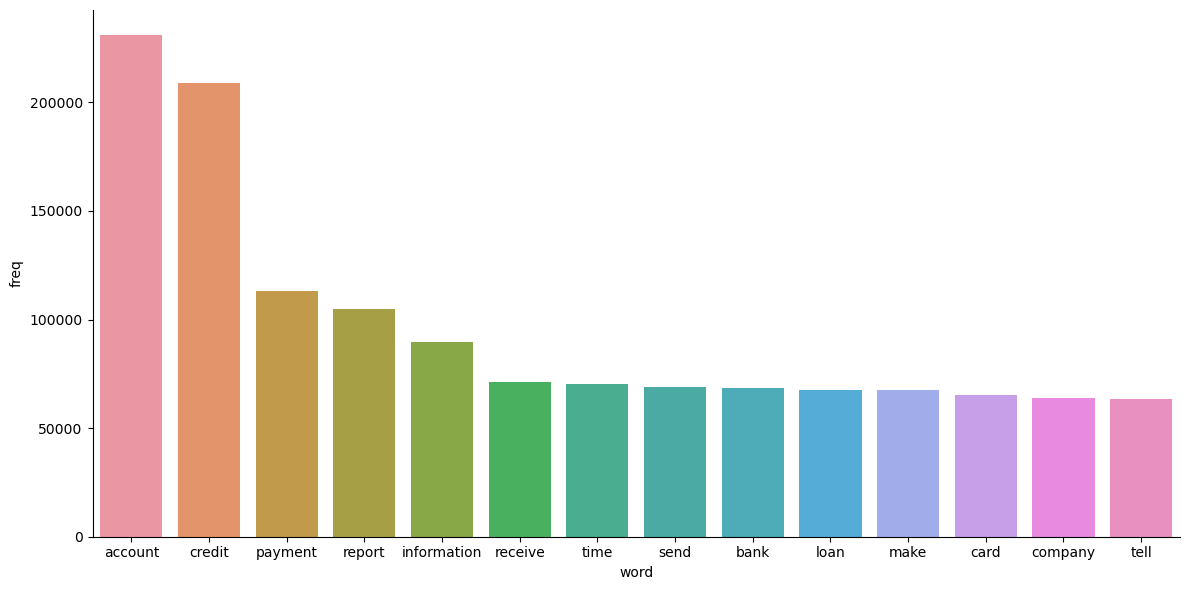

In [45]:
import seaborn as sns
fg = sns.factorplot(x = 'word', y = 'freq',size = 6, aspect =2,kind='bar',data=w)

In [46]:
text = " ".join(review for review in data.narrative)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 60021004 words in the combination of all review.


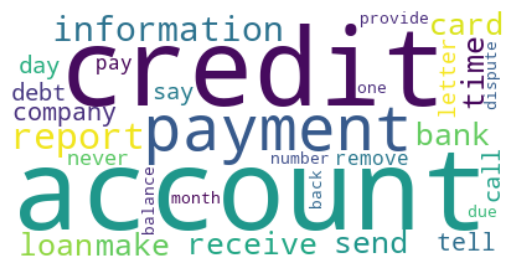

In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=30).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()